# Vinho Verde Red Wine Classification on Quality of Taste

***

<div class="alert alert-block alert-danger">
<b>Objective:</b> 
    
In this notebook we want to assess the influence of the different characteristics of Portuguese red Vinho Verde wine on its taste, in order to be able to improve our own wine influencing these characteristics during the process of the wine production.
</div>

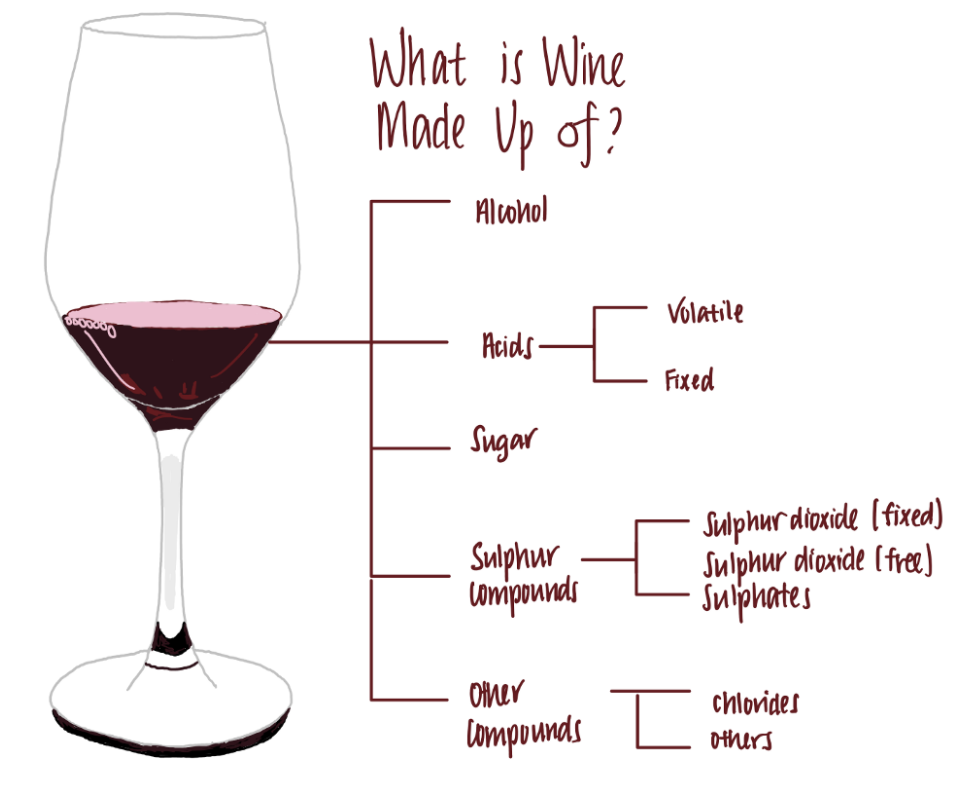

<div class="alert alert-block alert-danger">
<b>Description of the Characteristics:</b> 
    
In our assessment, 11 characteristics or more specific, physico-chemicals, are evaluated. In the following table, their unit, relationship with the taste of wine and a recommendation on changing its level are shown:

|Number|Physico-chemical|Unit|Relationship with Wine|Recommendation on Level Changing|
|------|------|------|------|------|
|1 |Fixed Acidity       |g(tartaric acid)/L     |Impart the sourness or tartness                     |Deacidification: neutralizing agents or by malo-lactic fermentation & Acidification: adding fermenting sucrose solutions|
|2 |Volatile Acidity    |g(acetic acid)/L       |Too high level vinegar taste                        |Adjust by lactic bacteria control acitivity|
|3 |Citric Acid         |g/L                    |Adds freshness and flavor to wines (but low)        |Deacidification: neutralizing agents or by malo-lactic fermentation & Acidification: adding fermenting sucrose solutions|
|4 |Residual Sugar      |g/L                    |Sugar remaining after frementation process          |Suspending the sugar fermentation carried out by yeasts|
|5 |Chlorides           |g(sodium chloride)/L   |Concentration of salt (regulated by law)            |Add electrodialysis or ion exchange; flushing the root soil zone to remove salt|
|6 |Free Sulfur Dioxide |mg/L                   |Prevents microbial growth and oxidation             |Add sulfur during wine making process|
|7 |Total Sulfur Dioxide|mg/L                   |Becomes evident in nose and taste at 50 ppm         |Add sulfur during wine making process|
|8 |Density             |g/cm³                  |Depending on percentage of alcohol and sugar content|/|
|9 |pH-level            |pH                     |Describes how acidic or basic a wine is             |Deacidification|
|10|Sulphates           |g(potassium sulphate)/L|Additive: antimicrobial and antioxidant             |Adjust added level|
|11|Alcohol             |% of volume            |Percentage of alcohol content                       |Monitor grape sugar concentration prior to harvest|
    
(The physico-chemicals are referred to as features or variables in the rest of the notebook)
</div>

***

<div class="alert alert-block alert-info">
<b>Content of the Notebook:</b> 
    
- [Packages and Data Import](#Import)
    
    
- [Exploratory Data Analysis](#Analysis)
    1. [Data Exploration](#Exploring)
    2. [Data Preparation](#Preparation)
    3. [Create Data Frame With Binary Response Variable](#Binary)
    4. [Data Exploring - Binary](#ExploringBinary)
    5. [Logistic Plots - Binary](#LogPlot)
    
    
    
- [Model Fitting](#model)
    1. [Binary Logistic Regression](#modellogistic)
    2. [Conclusion](#modelconclusion)
    
    
    
- [Important Features Selection](#important)
    1. [Random Forest](#forest)    
    2. [Conclusion](#conclusionforest)    

    

    
- [Summary](#summary)
    
    
    
- [Application of the Model](#use)
    1. [With Input of Measurements](#measure)
    2. [With Example out of Dataset](#example)
    
    
    
- [Adjust Wine Characteristics](#adjust)
    1. [Assessment of Data Input](#input)
    2. [Assessment of Example out of Dataset](#dataset)
    3. [Result](#result)
</div>


***

<a id="Import"></a>

## Packages and Data Import

<div class="alert alert-block alert-warning">
<b>Action:</b> Importing the packages</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_selection import chi2
from pandas import DataFrame
from statsmodels.formula.api import logit
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.impute import SimpleImputer
import random

<div class="alert alert-block alert-warning">
<b>Action:</b> Loading the data</div>

In [2]:
ds = pd.read_csv('winequality-red.csv', sep=";")

<div class="alert alert-block alert-warning">
<b>Action:</b> Structuring features</div>

In [3]:
ds.columns = ds.columns.str.replace(' ','_')

var_names = pd.DataFrame(ds.columns[0:11]).rename(columns={0:'variables'})
var_names

,variables
0,fixed_acidity
1,volatile_acidity
2,citric_acid
3,residual_sugar
4,chlorides
5,free_sulfur_dioxide
6,total_sulfur_dioxide
7,density
8,pH
9,sulphates


***

<a id="Analysis"></a>

## Exploratory Data Analysis

<a id="Exploring"></a>

### 1. Data Exploration

<div class="alert alert-block alert-warning">
<b>Action:</b> Checking for the sample size and the amount of variables
</div>

In [4]:
ds.shape

(1599, 12)

<div class="alert alert-block alert-warning">
<b>Action:</b> Checking the first 5 entries
</div> 

In [5]:
ds.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<div class="alert alert-block alert-warning">
<b>Action:</b> Checking if there are empty values
</div> 

In [6]:
ds.isnull().values.any()

False

<div class="alert alert-block alert-warning">
<b>Action:</b> Description of all variables to get an idea about their ranges: the distribution of the response variable 'quality' and the ranges of the features to check whether unreasonable outliers are present
</div> 

In [7]:
ds.describe().round(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


<div class="alert alert-block alert-warning">
<b>Action:</b> Value counts for each feature to evaluate whether there are outliers; choose var_names.variables[0:10]
</div> 

In [8]:
ds[var_names.variables[0]].value_counts().to_frame()

,fixed_acidity
7.2,67
7.1,57
7.8,53
7.5,52
7.0,50
...,...
4.6,1
13.5,1
4.9,1
15.9,1


<div class="alert alert-block alert-warning">
<b>Action:</b> Histogram of the response variable 'quality'
</div> 

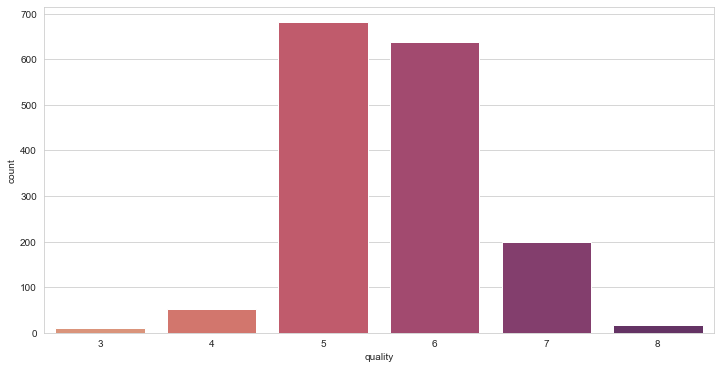

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=ds, palette='flare');

<div class="alert alert-block alert-warning">
<b>Action:</b> Histograms of all features
</div> 

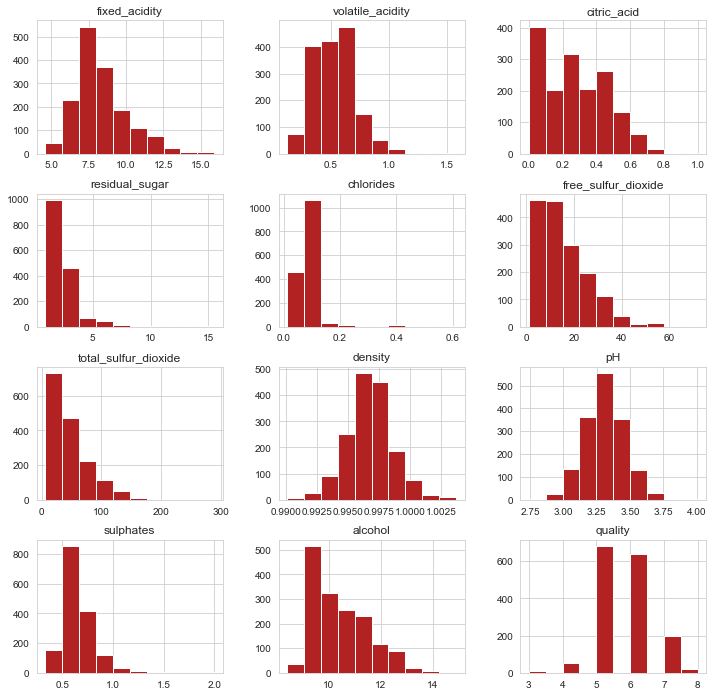

In [10]:
viz = ds
viz.hist(figsize=(12, 12), color = 'firebrick')
plt.show() 

<div class="alert alert-block alert-warning">
<b>Action:</b> Correlation matrix (Especcially the last row is interesting, i.e. the correlation of all the features to the dependent variable quality)
</div> 

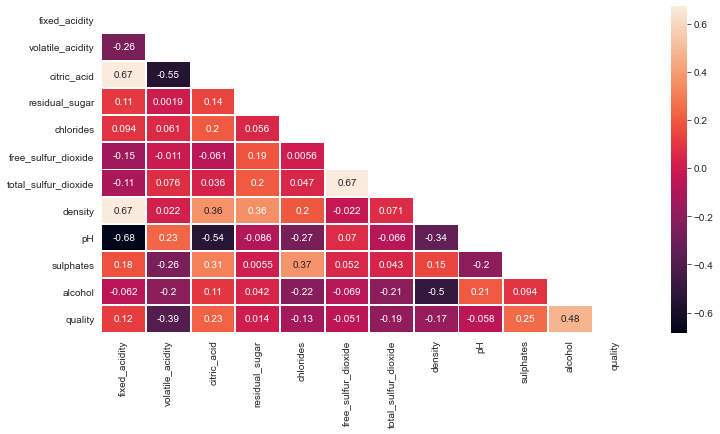

In [86]:
plt.figure(figsize=(12, 6))
matrix = np.triu(ds.corr())
sns.heatmap(ds.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

<div class="alert alert-block alert-warning">
<b>Action:</b> Boxplots of all features
</div> 

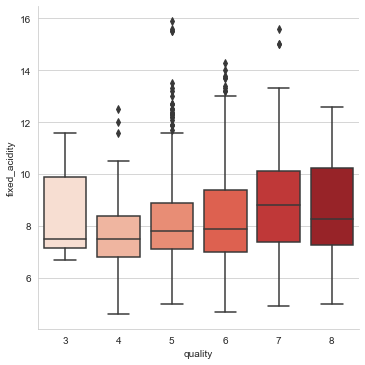

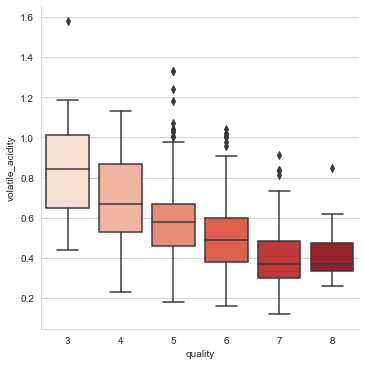

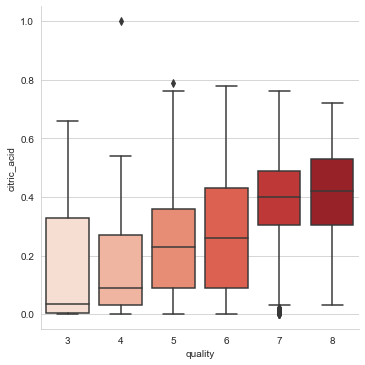

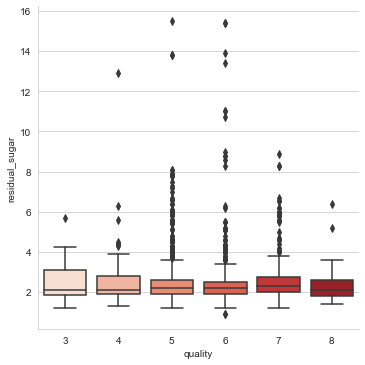

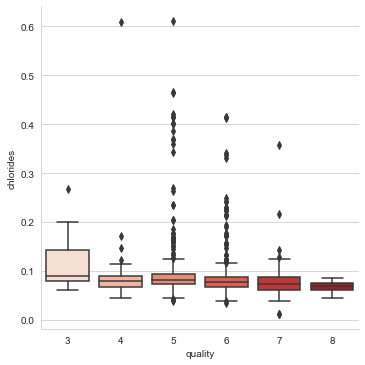

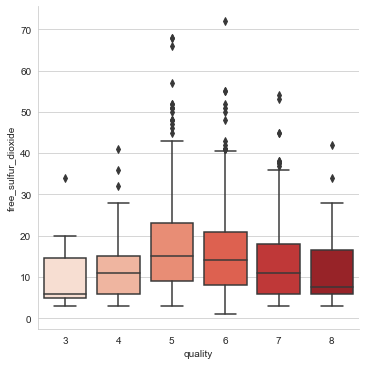

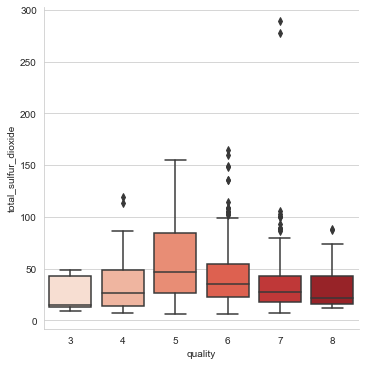

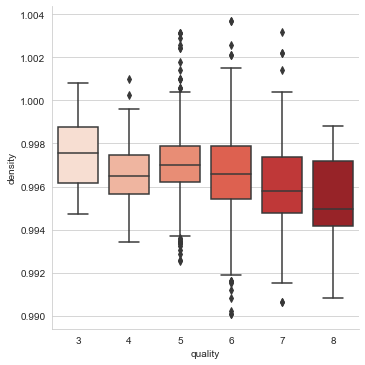

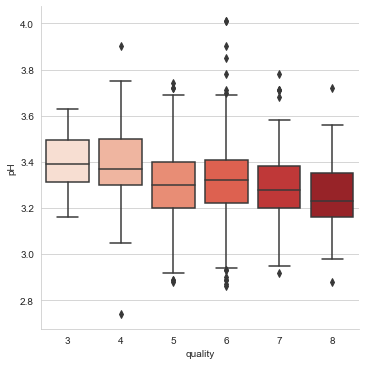

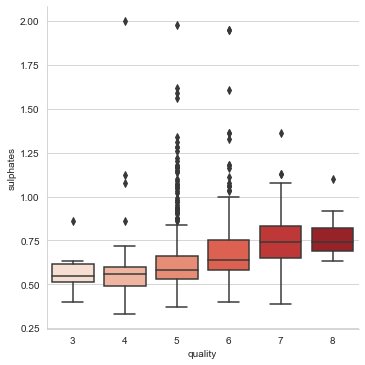

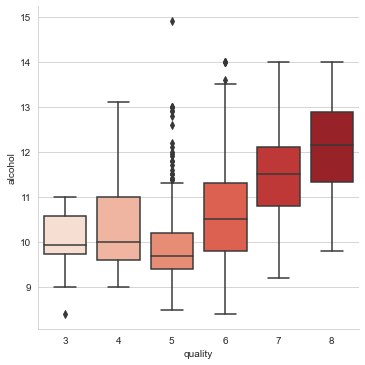

In [59]:
sns.catplot(x="quality", y=var_names.variables[0], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[1], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[2], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[3], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[4], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[5], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[6], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[7], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[8], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[9], data=ds, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[10], data=ds, kind="box", palette='Reds');

<a id="Preparation"></a>

### 2. Data Preparation

<div class="alert alert-block alert-danger">
<b>Conclusion:</b> 
    
Based on the Data Exploration and the following table, there is no data preparation necessary: 

***No unreasonable outliers are detected.***
<br>
<br>
Research on the features' desirable intervals:


|Number|Physico-chemical|Unit|Lower Bound|Upper Bound|
|------|------|------|------|------|
|1     |Fixed Acidity       |g/L  |5.8  |11.2|
|2     |Volatile Acidity    |g/L  |0.03%   |0.06%|
|3     |Citric Acid         |g/L  |0   |500|
|4     |Residual Sugar      |g/L  |0   |50|
|5     |Chlorides           |g/L  |0   |0.9|
|6     |Free Sulfur Dioxide |mg/L |0   |80|
|7     |Total Sulfur Dioxide|mg/L |2   |180|
|8     |Density             |g/cm³|0   |1|
|9     |pH-level            |pH   |3   |4|
|10    |Sulphates           |g/L  |0.05|2|
|11    |Alcohol             |%    |5   |15|

Sources:
https://winefolly.com/deep-dive/understanding-acidity-in-wine/
https://winefolly.com/deep-dive/sulfites-in-wine/
https://www.wineperspective.com/wine-acidity/
https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
https://www.winecurmudgeon.com/residual-sugar-in-wine-with-charts-and-graphs/
https://morewinemaking.com/articles/SO2_management
    </div>

<a id="Binary"></a>

### 3. Create Data Frame With Binary Response Variable

<div class="alert alert-block alert-warning">
<b>Action:</b> Create two classes: ratings [0,6] are bad = 0 and ratings [7,10] are good = 1
</div> 

In [13]:
ds_b = ds.copy(deep=True)
ds_b.loc[(ds_b.quality <= 6), ['quality']] = 0
ds_b.loc[(ds_b.quality >= 7), ['quality']] = 1
#ds_b['quality']

<a id="ExploringBinary"></a>

### 4. Data Exploring - Binary

In [14]:
#ds_b.head()

<div class="alert alert-block alert-warning">
<b>Action:</b> Description of the data distribution, focussing on the distribution of the new response variable
</div> 

In [15]:
ds_b.describe().round(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,0.1
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.3
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,0.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,0.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,0.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,0.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,1.0


<div class="alert alert-block alert-warning">
<b>Action:</b> Histogram of new binary response variable quantity
</div> 

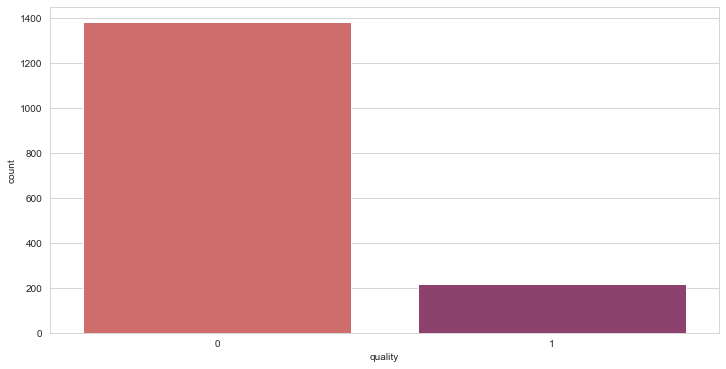

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=ds_b, palette='flare');

<div class="alert alert-block alert-warning">
<b>Action:</b> Boxplots of all features wiht new binary response variable quantity
</div> 

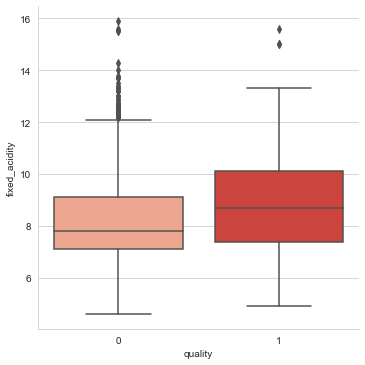

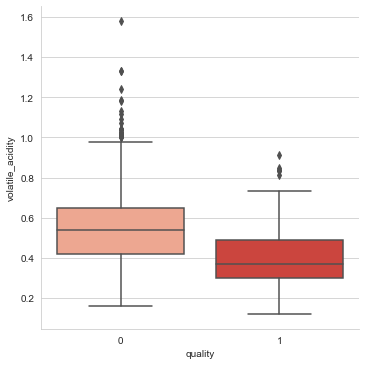

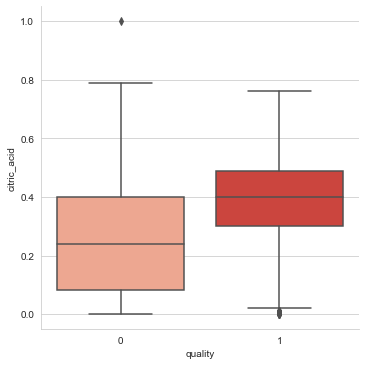

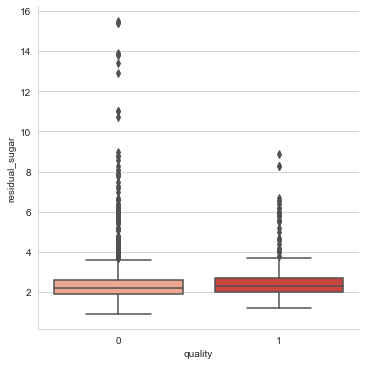

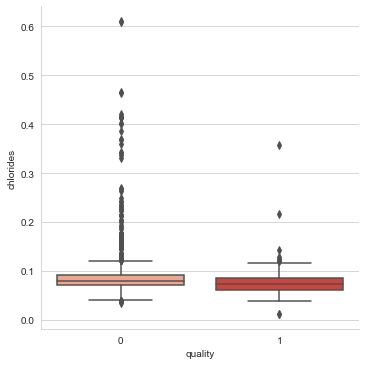

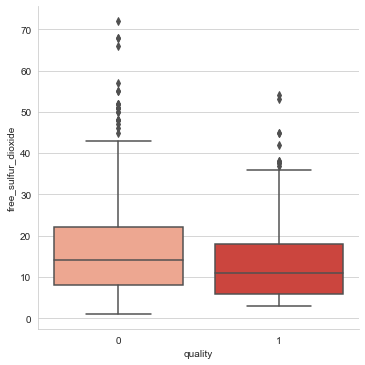

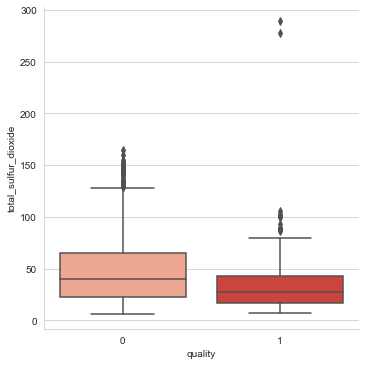

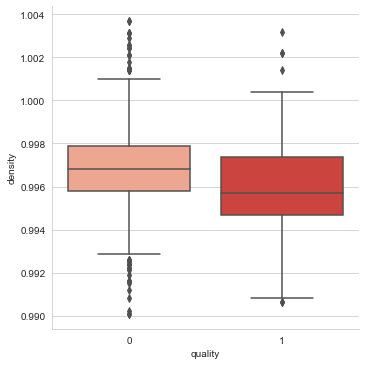

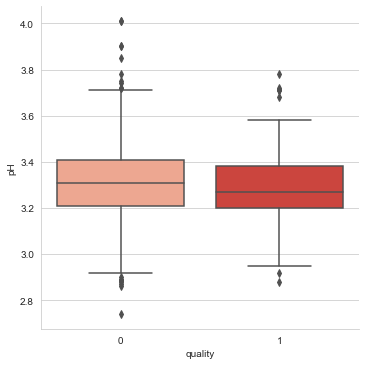

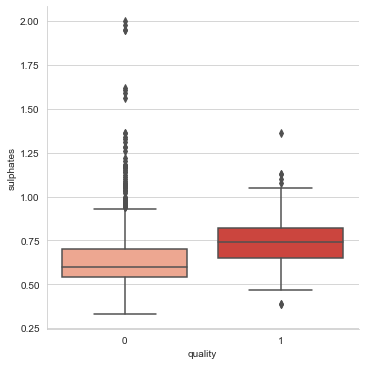

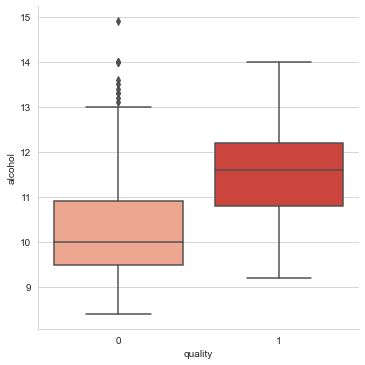

In [17]:
sns.catplot(x="quality", y=var_names.variables[0], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[1], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[2], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[3], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[4], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[5], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[6], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[7], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[8], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[9], data=ds_b, kind="box", palette='Reds')
sns.catplot(x="quality", y=var_names.variables[10], data=ds_b, kind="box", palette='Reds');

<a id="LogPlot"></a>

### 5. Logistic Plots - Binary

<div class="alert alert-block alert-warning">
<b>Action:</b> Logistic plot of each variable independently
</div> 

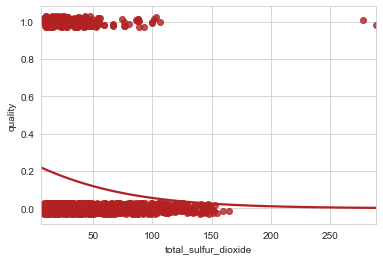

In [69]:
sns.regplot(x = var_names.variables[6], y = ds_b.quality, y_jitter = 0.03, data = ds, logistic = True, ci = None, color = 'firebrick')
plt.show()

***

<a id="model"></a>

## Model Fitting

<a id="modellogistic"></a>

### 1. Binary Logistic Regression

<div class="alert alert-block alert-warning">
<b>Action:</b> Creating Logistic Regression function
</div> 

In [19]:
# predifining the storage variables
coef = ()
data = ()

def logistic_regression(ds_b, coef, data):
    
    # selecting the data
    X = ds_b.drop("quality", axis=1)
    y = ds_b['quality']
    
    # sampling the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    interval = len(y_train)
    
    # standardizing the data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # storage of data element to use in application of the model at the end, choose number [1-1599]
    number = random.randint(1,interval)
    logistic_regression.data = np.append(X_train[number,:], y[number]).tolist()
    
    # classification using logistic regression and coefficients storage
    lr = LogisticRegression(penalty='none')
    lr.fit(X_train, y_train)
    logistic_regression.coef = np.append(lr.intercept_, lr.coef_).tolist()
    
    # other log regr classification function, same assessment, but interpretable output view (to see p-values)
    lr2=sm.Logit(y_train,sm.add_constant(X_train)).fit()
    
    # generation of coefficients plot (first regression)
    importance = lr.coef_[0]
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    pyplot.bar([x for x in range(len(importance))], importance, color = 'firebrick')
    pyplot.title("Coefficients")
    plot_1 = pyplot.show()

    # generation ROC-curve
    y_pred_proba = lr.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC="+str(auc), color = 'firebrick')
    plt.legend(loc=4)
    plt.title("ROC-curve")
    plot_2 = plt.show()

    # output structure
    print("===================================================================================================================")
    print("                                              LOGISTIC REGRESSION")
    print("===================================================================================================================")
    print("\n" + "- SUMMARY OF LOGIT")
    print(lr2.summary())
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- COEFFICIENTS OF LOGISTICREGRESSION")
    print("    (see graph above)")
    print(logistic_regression.coef)
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- CONFUSION MATRIX")
    print(confusion_matrix(y_test, lr.predict(X_test)))
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- REPORT")
    print(classification_report(y_test, lr.predict(X_test)))
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- ROC (see graph above)")
    print("___________________________________________________________________________________________________________________")

<div class="alert alert-block alert-warning">
<b>Action:</b> Performing the model & Storing the coefficients and the selected data
</div> 

Optimization terminated successfully.
         Current function value: 0.270789
         Iterations 8
Feature: 0, Score: 0.47101
Feature: 1, Score: -0.49314
Feature: 2, Score: 0.06094
Feature: 3, Score: 0.32395
Feature: 4, Score: -0.33254
Feature: 5, Score: 0.13412
Feature: 6, Score: -0.61801
Feature: 7, Score: -0.46445
Feature: 8, Score: 0.04707
Feature: 9, Score: 0.59231
Feature: 10, Score: 0.80806


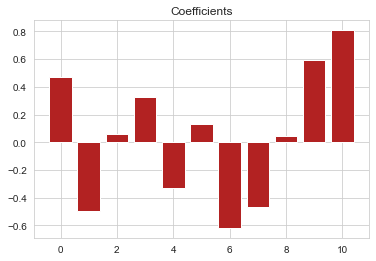

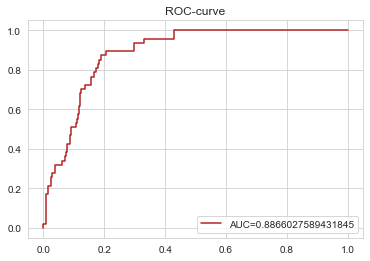

                                              LOGISTIC REGRESSION

- SUMMARY OF LOGIT
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1267
Method:                           MLE   Df Model:                           11
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.3090
Time:                        17:43:54   Log-Likelihood:                -346.34
converged:                       True   LL-Null:                       -501.23
Covariance Type:            nonrobust   LLR p-value:                 7.588e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8297      0.156    -18.111      0.000      -3.136      -2.523
x1             0.4710      0.244      1.933  

In [20]:
logistic_regression(ds_b, coef, data)
coef_storage = logistic_regression.coef
data_example = np.append(1, logistic_regression.data).tolist()

<a id="modelconclusion"></a>

### 2. Conclusion

<div class="alert alert-block alert-danger">
<b>Conclusion:</b> 
    
The coefficients of the model (rounded to 0.001):
    
    
|Feature|p-value|Coefficient|
|------|------|------|
|Constant            ||-2.830|
|Fixed Acidity       |0.053|0.471|
|Volatile Acidity    |0.002|-0.493|
|Citric Acid         |0.742|0.061|
|Residual Sugar      |0.006|0.0324|
|Chlorides           |0.041|-0.333|
|Free Sulfur Dioxide |0.362|0.134|
|Total Sulfur Dioxide|0.001|-0.618|
|Density             |0.044|-0.464|
|pH-level            |0.785|0.047|
|Sulphates           |0.000|0.592|
|Alcohol             |0.000|0.808|
    
</div> 

<a id="important"></a>

## Important Features Selection

<a id="forest"></a>

### 1. Random Forest

<div class="alert alert-block alert-warning">
<b>Action:</b> Creating Random Forest function
</div> 

In [21]:
def random_forest(ds_b, standardize):
    
    # data selection
    quality = ds_b['quality']
    X = ds_b.drop("quality", axis=1)
    y = quality
    
    # data sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # standardization option
    if standardize:
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
      
    # random forest classification
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    # store and sort most important features in dataframe
    fi_model = pd.DataFrame({'Feature': var_names.variables, 'Importance': rf.feature_importances_})
    fi_model.sort_values("Importance", inplace=True, ascending=True)
        
    # generation of important features plot
    plt.barh(fi_model.Feature, fi_model.Importance, color = 'firebrick')
    plt.xlabel("Relative Importance")
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()
    
    # selection of most important features
    best_features = fi_model[fi_model.iloc[:, 1] >= 0.08].\
                    sort_values('Importance', ascending = False)

    # output structure
    print("===================================================================================================================")
    print("                                               RANDOM FOREST")
    print("===================================================================================================================")
    print("\n" + "- Classification Report")
    print(classification_report(y_test, rf.predict(X_test)))
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- Features Importance Data")
    print(fi_model)
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- Features Importance Figure")
    print("  (see figure above)")
    print(plt.show())
    print("___________________________________________________________________________________________________________________")
    print("\n" + "- Best Features")
    print(best_features)
    print("___________________________________________________________________________________________________________________")

<div class="alert alert-block alert-warning">
<b>Action:</b> Performing the Random Forest model on the non-standardised data
</div> 

In [22]:
#random_forest(ds_b, standardize=False)

<div class="alert alert-block alert-warning">
<b>Action:</b> Performing the Random Forest model on the standardised data
</div> 

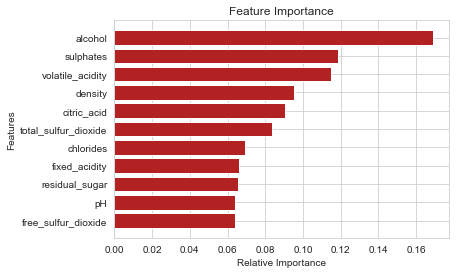

                                               RANDOM FOREST

- Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.79      0.55      0.65        47

    accuracy                           0.91       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.91      0.91      0.91       320

___________________________________________________________________________________________________________________

- Features Importance Data
                 Feature  Importance
5    free_sulfur_dioxide    0.063698
8                     pH    0.064020
3         residual_sugar    0.065618
0          fixed_acidity    0.066091
4              chlorides    0.069026
6   total_sulfur_dioxide    0.083457
2            citric_acid    0.090194
7                density    0.095429
1       volatile_acidity    0.114900
9              sulphates    0.118485
10               alcohol    0.169082

In [23]:
random_forest(ds_b, standardize=True)

<a id="conclusionforest"></a>

### 2. Conclusion

<div class="alert alert-block alert-danger">
<b>Standardisation:</b>
    
|Standardisation|F1-score (macro average)|
|------|------|
|No     |78%     |
|Yes     |80%     |

 => Standardised model performs slightly better (based on one of the random forest iterations)

</div> 

<div class="alert alert-block alert-danger">
<b>Conclusion:</b> 
    
The best features (threshold 8% of relative importance) and their relative importance (rounded to 0.01):
    
    
|#|Feature|Relative Importance (%)|
|------|------|------|
|1     |Alcohol     |17.21     |
|2     |Sulphates     |12.26     |
|3     |Volatile Acidity     |11.15   |
|4     |Density     |9.10     |
|5     |Total Sulfur Dioxide     |8.27     |
|6     |Citric Acid     |8.16     |
    
(based on one of the random forest iterations)

</div> 

***

<a id="summary"></a>

## Summary

<div class="alert alert-block alert-danger">
<b>Model:</b>     
    
|Feature|p-value|Coefficient|
|------|------|------|
|Constant            ||-2.830|
|Fixed Acidity       |0.053|0.471|
|Volatile Acidity    |0.002|-0.493|
|Citric Acid         |0.742|0.061|
|Residual Sugar      |0.006|0.0324|
|Chlorides           |0.041|-0.333|
|Free Sulfur Dioxide |0.362|0.134|
|Total Sulfur Dioxide|0.001|-0.618|
|Density             |0.044|-0.464|
|pH-level            |0.785|0.047|
|Sulphates           |0.000|0.592|
|Alcohol             |0.000|0.808|
    
</div> 

<div class="alert alert-block alert-danger">
<b>Conclusion & Remediation:</b> 
    
The coefficients (rounded to 0.001) and their impact and prediction are:

    
|#|Physico-chemical|p-value|Coefficient|Impact|Higher level is prediction of|Remediation|Advice|
|------|------|------|------|------|------|-----|-----|
|0     |Constant||-2.830|||||
|1     |Alcohol             |0.000|0.808 |+|excellent|Monitor grape sugar concentration prior to harvest|Consider|
|2     |Sulphates           |0.000|0.592  |+|excellent|Adjust added level|Consider|
|3     |Volatile Acidity    |0.002|-0.493 |-|not excellent|Adjust by lactic bacteria control acitivity|Consider
|4     |Total Sulfur Dioxide|0.001|-0.618 |-|not excellent|Adjust (lower) sulfur during wine making process|Consider|
|||||||||
|5     |Density             |0.044|-0.464 |-|not excellent|Dependent on alcohol and residual sugar level, not individually adjustable||
|6     |Citric Acid         |0.742||||||

</div> 

***

<a id="use"></a>

## Application of the Model

<a id="measure"></a>

### 1. With Input of Measurements

<div class="alert alert-block alert-warning">
<b>Action:</b> Input of the measurements
</div> 

In [47]:
# predefining storage variable
table_input = ()

def features_input (table_input):
    
    # input of measurement
    print("Enter Measurements of the Features (standardized values):" + "\n\n")
    input_1 = input("Fixed Acidity (g/L): ")
    input_2 = input("Volatile Acidity (g/L): ")
    input_3 = input("Citric Acid (g/L): ")
    input_4 = input("Residual Sugar (g/L): ")
    input_5 = input("Chlorides (g/L): ")
    input_6 = input("Free Sulfur Dioxide (mg/L): ")
    input_7 = input("Total Sulfur Dioxide (mg/L): ")
    input_8 = input("Density (g/cm³): ")
    input_9 = input("pH-level (pH): ")
    input_10 = input("Sulphates (g/L): ")
    input_11 = input("Alcohol (%): ")
    measurements = ['1', input_1, input_2, input_3, input_4, input_5, input_6, input_7, input_8, input_9, input_10, input_11]
    
    # dataframe generation
    input_data = pd.DataFrame(np.append('constant', var_names['variables']).tolist(), columns = ['variables'])   
    input_data['data'] = measurements
    input_data['coefficients'] = coef_storage
    features_input.table_input = input_data
    
    # calculation
    input_data["product"] = input_data["data"].apply(lambda x: float(x)) * input_data["coefficients"].apply(lambda x: float(x))
    prediction = (1 + np.exp(-sum(input_data["product"])))**-1
    
    # structure output
    print(input_data)
    print("")
    print("PREDICTED PROBABILITY OF CLASSIFIED AS EXCELLENT WINE")
    print(sum(input_data["product"]))

<div class="alert alert-block alert-warning">
<b>Action:</b> Perform classification
</div> 

In [ ]:
features_input(table_input)
table_input_storage = features_input.table_input

<a id="example"></a>

### 2. With Example out of Dataset

<div class="alert alert-block alert-warning">
<b>Action:</b> Example out of dataset
</div> 

In [50]:
# predefining storage variable
table_example = ()

def features_example (table_example):
    
    # generation dataframe
    example = pd.DataFrame(np.append('constant', var_names['variables']).tolist(), columns = ['variables'])   
    example['data'] = data_example[0:12]
    example['coefficients'] = coef_storage
    features_example.table_example = example

    # calculation
    example["product"] = example["data"].apply(lambda x: float(x)) * example["coefficients"].apply(lambda x: float(x))
    prediction = (1 + np.exp(-sum(example["product"])))**-1

    # structure output
    print(example)
    print("")
    print("PREDICTED PROBABILITY OF CLASSIFIED AS EXCELLENT WINE")
    print(prediction)
    print("")
    print("ACTUAL CLASSIFICATION IN DATASET")
    print(data_example[12:13])

<div class="alert alert-block alert-warning">
<b>Action:</b> Perform classification
</div> 

In [51]:
features_example(table_example)
table_example_storage = features_example.table_example

               variables      data  coefficients   product
0               constant  1.000000     -2.829666 -2.829666
1          fixed_acidity -0.187802      0.471006 -0.088456
2       volatile_acidity -0.784347     -0.493137  0.386791
3            citric_acid  0.140908      0.060936  0.008586
4         residual_sugar -0.456703      0.323949 -0.147949
5              chlorides -0.292985     -0.332542  0.097430
6    free_sulfur_dioxide  1.563989      0.134117  0.209758
7   total_sulfur_dioxide  1.134038     -0.618007 -0.700844
8                density  0.213463     -0.464448 -0.099143
9                     pH  0.508915      0.047072  0.023956
10             sulphates -0.286608      0.592305 -0.169759
11               alcohol -1.347642      0.808057 -1.088971

PREDICTED PROBABILITY OF CLASSIFIED AS EXCELLENT WINE
0.012149226755023902

ACTUAL CLASSIFICATION IN DATASET
[0.0]


***

<a id="adjust"></a>

## Adjust Wine Characteristics

<div class="alert alert-block alert-warning">
<b>Action:</b> When classified as 'not excellent', adjust and monitor levels described in the remediation in the summary.
  
</div> 

 - [Go to summary](#summary)

<div class="alert alert-block alert-warning">
<b>Action:</b> Create adjusting function
  
</div> 

In [89]:
def adjust_wine (table):
    
    # loading data
    adjusted_data = table.copy(deep=True)
    del adjusted_data['product']
    
    # adjustment of measurement
    print("Enter New Measurements of the Most Important Features (standardized values):" + "\n")
    input_1 = input("Alcohol (%): ")
    input_2 = input("Sulphates (g/L): ")
    input_3 = input("Volatile Acidity (g/L): ")
    input_4 = input("Total Sulfur Dioxide (mg/L): ")
    
    # adjust values
    n1 = adjusted_data[adjusted_data['variables'] == 'alcohol'].index
    n2 = adjusted_data[adjusted_data['variables'] == 'sulphates'].index
    n3 = adjusted_data[adjusted_data['variables'] == 'volatile_acidity'].index
    n4 = adjusted_data[adjusted_data['variables'] == 'total_sulfur_dioxide'].index
    adjusted_data.at[n1,'data'] = input_1
    adjusted_data.at[n2,'data'] = input_2
    adjusted_data.at[n3,'data'] = input_3
    adjusted_data.at[n4,'data'] = input_4

    # calculation
    adjusted_data["product"] = adjusted_data["data"].apply(lambda x: float(x)) * adjusted_data["coefficients"].apply(lambda x: float(x))
    prediction = (1 + np.exp(-sum(adjusted_data["product"])))**-1
    
    # structure output
    print("")
    print(adjusted_data)
    print("")
    print("PREDICTED PROBABILITY OF CLASSIFIED AS EXCELLENT WINE")
    print(sum(adjusted_data["product"]))

<a id="input"></a>

### 1. Assessment of Data Input

<div class="alert alert-block alert-warning">
<b>Action:</b> Perform Prediction Adjusted Wine on Input Measurements
  
</div> 

In [84]:
adjust_wine(table_input_storage)

Enter New Measurements of the Most Important Features:

Alcohol (%): 
Sulphates (g/L): 
Volatile Acidity (g/L): 
Total Sulfur Dioxide (mg/L): 


ValueError: could not convert string to float: ''

<a id="dataset"></a>

### 2. Assessment of Example out of Dataset

<div class="alert alert-block alert-warning">
<b>Action:</b> Perform Prediction Adjusted Wine on Example
</div> 

In [85]:
adjust_wine(table_example_storage)

Enter New Measurements of the Most Important Features:

Alcohol (%): 2
Sulphates (g/L): 2
Volatile Acidity (g/L): -2
Total Sulfur Dioxide (mg/L): 0

               variables      data  coefficients   product
0               constant       1.0     -2.829666 -2.829666
1          fixed_acidity -0.187802      0.471006 -0.088456
2       volatile_acidity        -2     -0.493137  0.986275
3            citric_acid  0.140908      0.060936  0.008586
4         residual_sugar -0.456703      0.323949 -0.147949
5              chlorides -0.292985     -0.332542  0.097430
6    free_sulfur_dioxide  1.563989      0.134117  0.209758
7   total_sulfur_dioxide         0     -0.618007 -0.000000
8                density  0.213463     -0.464448 -0.099143
9                     pH  0.508915      0.047072  0.023956
10             sulphates         2      0.592305  1.184610
11               alcohol         2      0.808057  1.616113

PREDICTED PROBABILITY OF CLASSIFIED AS EXCELLENT WINE
0.9615156586184237


<a id="result"></a>

### 3. Result

<div class="alert alert-block alert-danger">
<b>Remediation:</b>    

(based on one random data element)
    
|Feature/Result|Original Measurement|Impact of a Higher Level|Adjusted Measurement|
|------|------|------|------|
|Volatile Acidity    |-0.784|-|-2|
|Total Sulfur Dioxide|1.134|-|0|
|Sulphates           |-0.287|+|2|
|Alcohol             |-1.348|+|2|
|||||
|Prediction of Probability 'Excellent'|1.2%|==>|96%|
    
</div> 

***

<div class="alert alert-block alert-info">
<b>Main Sources:</b>
    
- https://onezero.blog/modelling-binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation/
- https://www.kaggle.com/d4rklucif3r/red-wine-quality/notebook
- https://github.com/siddhant45/BRFSS-Random-Forests-Decision-Tree/blob/main/random-forests-decision-tree-by-sid.ipynb
- https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
- https://medium.com/usf-msds/intuitive-interpretation-of-random-forest-2238687cae45
- https://www.kaggle.com/dansbecker/partial-dependence-plots/
- https://towardsdatascience.com/what-makes-a-wine-good-ea370601a8e4
</div>